<a href="https://colab.research.google.com/github/JungChnagHwi/practice1/blob/master/data_project/diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#diabetes data

Pregnancies : 임신 횟수

Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

BloodPressure : 이완기 혈압 (mm Hg)

SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

Insulin : 2시간 혈청 인슐린 (mu U / ml)

BMI : 체질량 지수 (체중kg / 키(m)^2)

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [5]:
# One-Hot-Encoding
# 수치 => 범주 => 수치
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

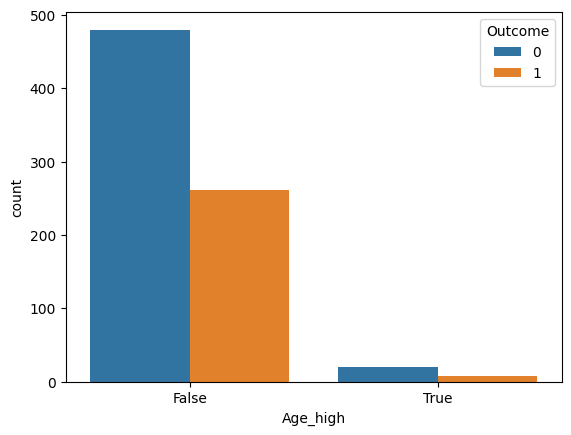

In [6]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [10]:
df["Insulin_nan"].isnull().sum()

374

In [11]:
# 결측치 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [12]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [13]:
# 결측치 채우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

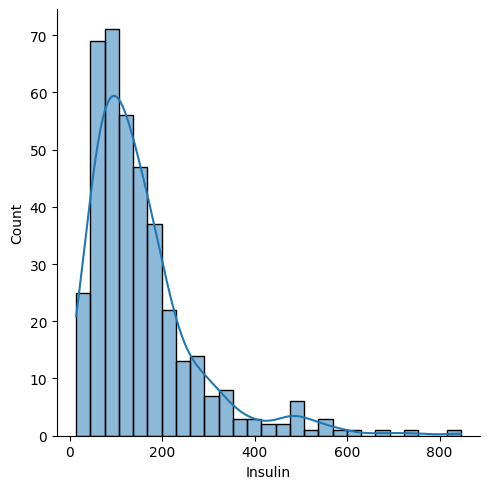

In [14]:
#왜도 첨도
# sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])
# seaborn 0.11.0 이상
sns.displot(df.loc[df["Insulin"] > 0, "Insulin"], kde=True)

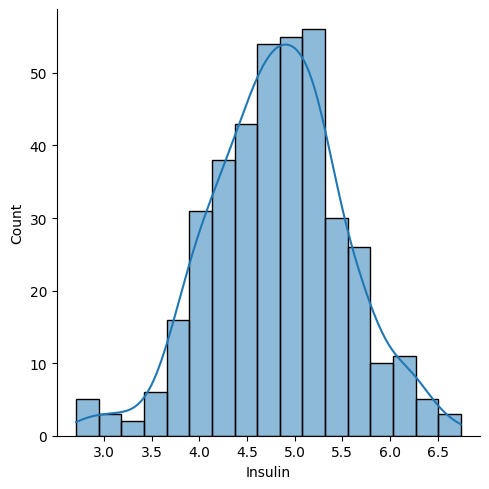

In [15]:
Insulin_log = np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1)
# sns.distplot(Insulin_log)
# seaborn 0.11.0 이상
sns.displot(Insulin_log, kde=True)

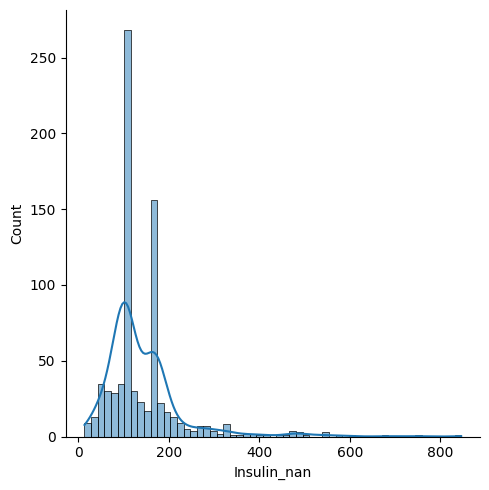

In [16]:
sns.displot(df, x="Insulin_nan", kde=True)

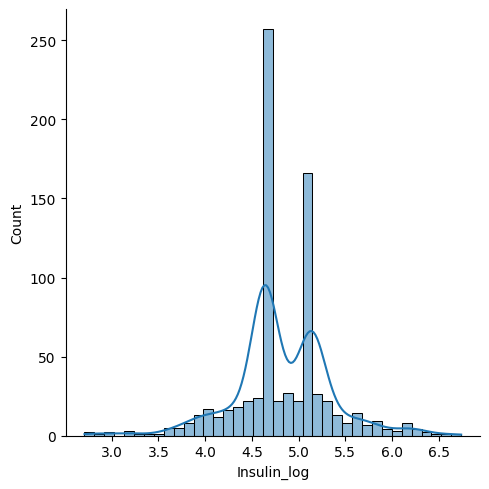

In [17]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.displot(df, x="Insulin_log", kde=True)

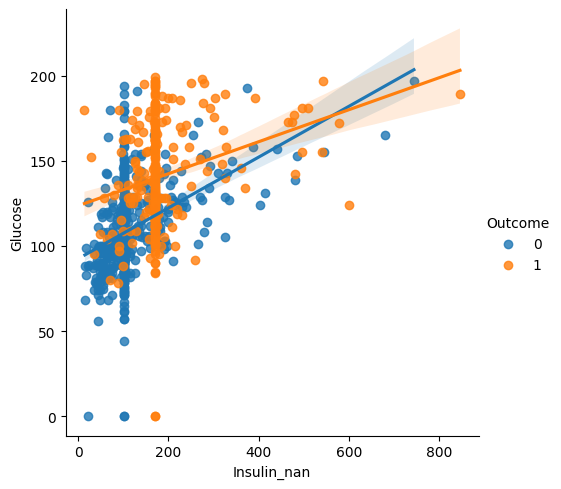

In [18]:
#EDA에서 해본 상관분석을 바탕으로 파생변수를 생성
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [19]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [20]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


<Axes: xlabel='Insulin_nan'>

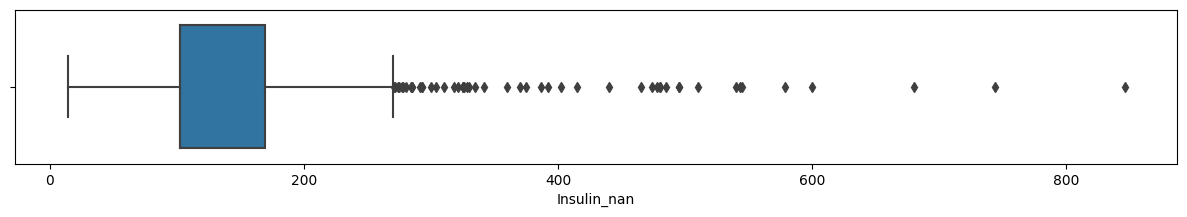

In [21]:
plt.figure(figsize=(15, 2))
sns.boxplot(data=df, x="Insulin_nan")

In [22]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [23]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [24]:
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [25]:
df[df["Insulin_nan"] > OUT].shape

(51, 16)

In [26]:
df[df["Insulin_nan"] > 600].shape

(3, 16)

In [27]:
#스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [28]:
# df[["Glucose", "DiabetesPedigreeFunction"]] = scale
# df[["Glucose", "DiabetesPedigreeFunction"]].head(

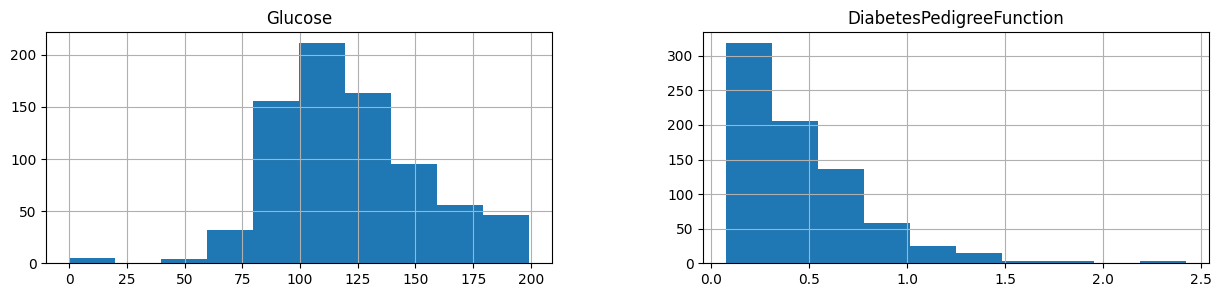

In [29]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

In [30]:
df.to_csv("diabetes_feature.csv", index=False)

In [31]:
pd.read_csv("diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [33]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
#split_count = int(df.shape[0] * 0.8)
#split_count

In [34]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
#train = df[:split_count].copy()
#train.shape

In [35]:
#train[train["Insulin_nan"] < 600].shape

In [36]:
#train = train[train["Insulin_nan"] < 600]
#train.shape

In [37]:
#test = df[split_count:].copy()
#test.shape

In [39]:

# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

#feature_names = train.columns[:-1].tolist()
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

In [40]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Outcome"
label_name

'Outcome'

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [42]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [43]:
y = df['Outcome']
y.shape

(768,)

In [44]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [45]:
# train 세트의 문제와 정답의 데이터 수를 확인합니다.

X_train.shape, y_train.shape

((614, 9), (614,))

In [46]:
# test 세트의 문제와 정답의 데이터 수를 확인합니다.

X_test.shape, y_test.shape

((154, 9), (154,))

In [47]:
# 학습 세트 만들기

#X_train = train[feature_names]
#print(X_train.shape)
#X_train.head()

In [48]:
# 정답 값을 만들어 줍니다.
#y_train = train[label_name]
#print(y_train.shape)
#y_train.head()

In [49]:
# 예측에 사용할 데이터세트를 만듭니다.

#X_test = test[feature_names]
#print(X_test.shape)
#X_test.head()

In [50]:
# 예측의 정답값
#y_test = test[label_name]

#print(y_test.shape)
#y_test.head()

In [51]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [53]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [54]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [55]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [56]:
clf.best_score_

0.8664934026389444

In [57]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.005975,0.000784,0.003317,0.000163,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.005239,0.000184,0.003151,0.000071,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.006809,0.001951,0.003499,0.000734,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.006191,0.000113,0.003258,0.000069,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.006604,0.001176,0.003189,0.000092,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [58]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [59]:
clf.score(X_test, y_test)

0.8701298701298701

In [60]:
model

DecisionTreeClassifier(random_state=42)

In [61]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([17,  9, 14, 16, 17,  8, 18, 13,  4, 11])

In [62]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [63]:
param_distributions = {"max_depth" :max_depth,
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([17,  9, 14, 16, 17,  8, 18, 13,  4, 11]),
 'max_features': array([0.96196393, 0.81682124, 0.85518716, 0.878002  , 0.77935003,
        0.71366945, 0.88303448, 0.98187112, 0.7895196 , 0.73797244,
        0.83356263, 0.75415824, 0.8368039 , 0.96296985, 0.89662898,
        0.78410395, 0.72666802, 0.80727942, 0.71781519, 0.75254463,
        0.83004213, 0.94673782, 0.71734715, 0.85925181, 0.82305005,
        0.74926353, 0.88523263, 0.90353387, 0.84482177, 0.70093567,
        0.94223427, 0.7941964 , 0.73847924, 0.81650155, 0.72570007,
        0.78276344, 0.99525837, 0.84507263, 0.76341145, 0.81508043,
        0.86904304, 0.88016122, 0.78023143, 0.93022037, 0.91697632,
        0.83859988, 0.96926379, 0.96738095, 0.75512866, 0.97625166,
        0.7921986 , 0.99005475, 0.75081721, 0.80550519, 0.91967595,
        0.79343039, 0.74567807, 0.93948646, 0.89592785, 0.98916934,
        0.86919701, 0.72947407, 0.72555807, 0.78605718, 0.84664684,
        0.70788644, 0.96200863, 0.961

In [64]:
#RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([17,  9, 14, 16, 17,  8, 18, 13,  4, 11]),
                                        'max_features': array([0.96196393, 0.81682124, 0.85518716, 0.878002  , 0.77935003,
       0.71366945, 0.88303448, 0.98187112, 0.7895196 , 0.73797244,
       0.83356263, 0.75415824, 0.8368039 , 0.96296985, 0.89662898,
       0....
       0.95743872, 0.93881686, 0.94719941, 0.90444948, 0.99017782,
       0.92859125, 0.70955139, 0.96554901, 0.84516027, 0.92284662,
       0.78691248, 0.90582396, 0.79715652, 0.81357579, 0.86588892,
       0.9497336 , 0.76947183, 0.87401861, 0.95042857, 0.97821883,
       0.82221107, 0.78552159, 0.72333785, 0.99771848, 0.7701807 ,
       0.78461927, 0.70761021, 0.76764142, 0.86812977, 0.75163513]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [65]:
clf.best_params_

{'min_samples_split': 6, 'max_features': 0.8959278471692159, 'max_depth': 9}

In [66]:
clf.best_score_

0.8713847794215648

In [67]:
clf.score(X_test, y_test)

0.8181818181818182

In [68]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
394,0.006728,0.001236,0.003570,0.000955,6,0.938817,9,"{'min_samples_split': 6, 'max_features': 0.938...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.02358,1
923,0.006078,0.000173,0.003223,0.000075,6,0.928591,9,"{'min_samples_split': 6, 'max_features': 0.928...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.02358,1
990,0.005944,0.000148,0.002988,0.000030,6,0.950429,9,"{'min_samples_split': 6, 'max_features': 0.950...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.02358,1
478,0.015649,0.003221,0.008195,0.004480,6,0.916976,9,"{'min_samples_split': 6, 'max_features': 0.916...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.02358,1
900,0.012172,0.002352,0.007850,0.004048,6,0.990055,9,"{'min_samples_split': 6, 'max_features': 0.990...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.02358,1


In [69]:
#----

In [70]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
#y_predict = model.predict(X_test)
#y_predict[:5]

In [72]:
feature_names = X_train.columns.tolist()

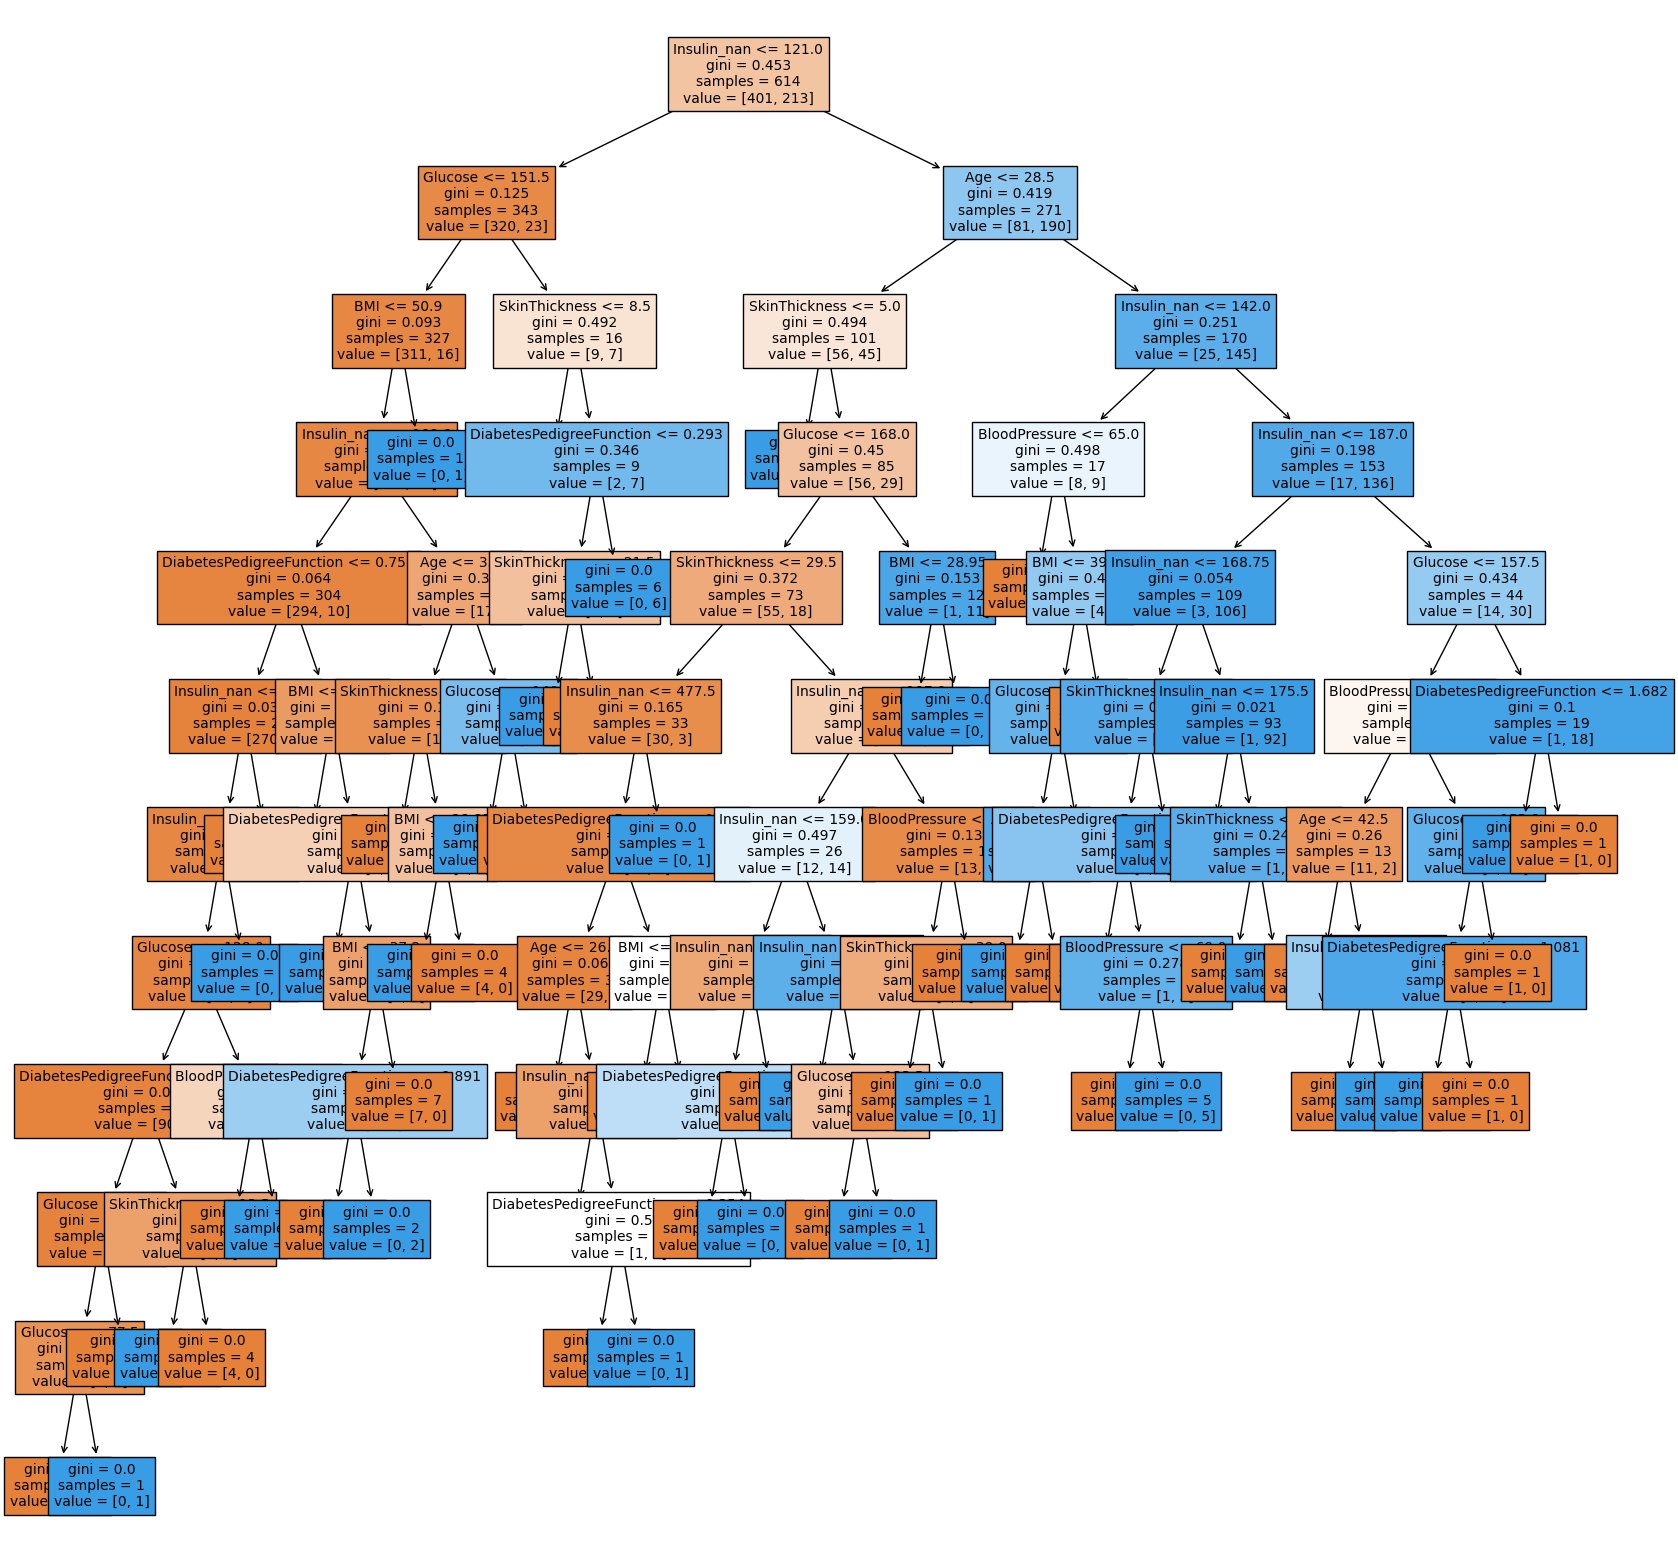

In [73]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

# graphviz 를 통해 시각화 합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [74]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [75]:
#model.feature_importances_

In [76]:
#----

<Axes: >

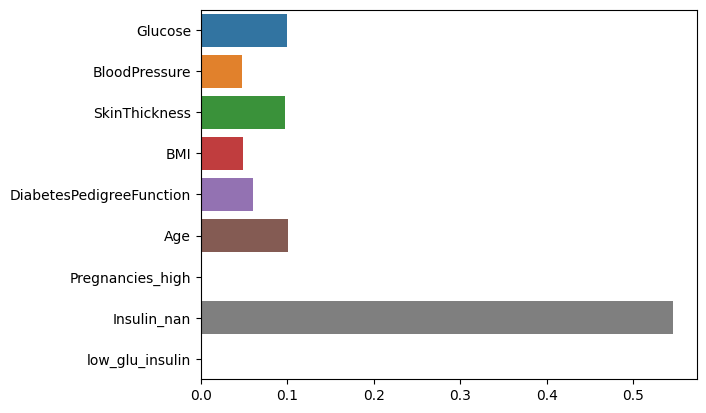

In [77]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

In [78]:
#실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# 44 => 39 => 49(나이25세 기준) => 55(나이30세 기준)
# => 23(인슐린 결측치를 평균으로 대체) => 16(인슐린 결측치를 중앙값으로 대체)
# => 15(인슐린&글루코스 파생수변수 추가)
# => 15(인슐린 수치 600이상 이상치제거 )
diff_count = abs(y_test - y_predict).sum()
diff_count

28

In [79]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
# 71 => => 85(인슐린 결측치를 평균으로 대체) => 89(인슐린의 결측치를 중앙값으로 대체)
# => 90(인슐린&글루코스 상관계수로 파생변수를 생성)
(len(y_test) - diff_count) / len(y_test) * 100

81.81818181818183

In [80]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

81.81818181818183

In [81]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

81.81818181818183

In [ ]:
#-----